In [675]:
with open("smartprix.html",'r',encoding='utf-8') as f:
    html=f.read()

In [676]:
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
soup = BeautifulSoup(html,'lxml')
containers = soup.find_all('div',{'class':'sm-product has-tag has-features has-actions'})

In [677]:
name=[]
price=[]
rating=[]
sim=[]
processor=[]
ram=[]
battery=[]
display=[]
camera=[]
card=[]
os=[] 

for i in containers:
    try:
        name.append(i.find("h2").text)
    except:
        name.append(np.nan)
    try:
        price.append(i.find('span',{'class':'price'}).text)
    except:
        price.append(np.nan)
    try:
        rating.append(i.find('div',{'class':'score rank-2-bg'}).find('b').text)
    except:
        rating.append(np.nan)
        
    x = i.find('ul',{'class':'sm-feat specs'}).find_all('li')
    try:
        sim.append(x[0].text)
    except:
        sim.append(np.nan)
    try:
        processor.append(x[1].text)
    except:
        processor.append(np.nan)
    try:    
        ram.append(x[2].text)
    except:
        ram.append(np.nan)
    try:
        battery.append(x[3].text)
    except:
        battery.append(np.nan)
    try:
        display.append(x[4].text)
    except:
        display.append(np.nan)
    try:
        camera.append(x[5].text)
    except:
        camera.append(np.nan)
    try:
        card.append(x[6].text)
    except:
        card.append(np.nan)
    try:
        os.append(x[7].text)
    except:
        os.append(np.nan)

In [678]:
phone_df = pd.DataFrame({'model':name,
              'price':price,
              "rating":rating,
              'sim':sim,
              'processor':processor,
              'ram':ram,
              'battery':battery,
              'display':display,
              'camera':camera,
              'card':card,
              'os':os})

In [679]:
phone_df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus Nord CE 2 Lite 5G,"₹18,999",81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
1,Samsung Galaxy A14 5G,"₹16,499",75,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
2,Samsung Galaxy F23 5G (6GB RAM + 128GB),"₹16,999",80,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
3,Motorola Moto G62 5G,"₹14,999",81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Data Cleaning

>Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row #290,496,785,837,995 -) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (268,290,315,496,535,655,995) `validity`
9. **battery** - incorrect values in rows(87,119,221,246,268,290,362,496,508,535,548,588,655,785,837,931) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(119,246,268,290,362,496,785) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (119,126,221,244,246,328,349,362,440,496,508,535,548,609,655,794
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`

>Tidiness Issues
1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

In [680]:
# first step to make the copy of your real dataframe and do the analysis on the copy dataframe
df = phone_df.copy()

In [681]:
phone_df[phone_df['price'].str.replace('₹','').str.replace(',','').astype('int') >= 3400].shape

(889, 11)

In [682]:
# removing ₹ , ',' from price column and data type to int
df['price']= df['price'].str.replace('₹','').str.replace(',','').astype('int')

In [683]:
# we are making another column as index starting from zero 
df = df.reset_index() 

In [684]:
# as per in our mnanual analysis we have index value stating from 2 as we are + 2 from default index we created one in df
df['index'] = df['index'] + 2

** during analysis we found that phones below 3800 are not smart phones se we removed those from our data.**

In [685]:
# during our manual analysis we remove all the phones which are less than 3400 because they are not smart phones
df = df[df['price'] >= 3800]

In [686]:
# converting the columns into sets which have dirty data - sets to remove duplicate rows 
processor = set((290,496,785,837,995))
memory = set((268,290,315,496,535,655,995))
battery = set((87,119,221,246,268,290,362,496,508,535,548,588,655,785,837,931))
display = set((119,246,268,290,362,496,785))
camera = set((119,126,221,244,246,328,349,362,440,496,508,535,548,609,655,794))


In [687]:
# doing index of all these columns to get all rows unique
untidy_rows = processor|memory|battery|display|camera


In [688]:
# only have one row in dataframe which have issue in processor, memory, battery, display, camera 
df[df['index'].isin(processor & memory & battery & display & camera)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
494,496,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [689]:
# we are dropping rows as per processor column which are not smart phone
df.drop([288,494,783,993,835],inplace = True)

In [690]:
temp_df = df[df['index'].isin(battery)]

In [691]:
x = temp_df.iloc[:,7:].shift(1,axis = 1).values

In [692]:
df.loc[temp_df.index,temp_df.columns[7:]] = x

In [693]:
camera_df = df[df['index'].isin(camera)]

In [694]:
cam_df = camera_df[~camera_df['camera'].str.contains('M')]

In [695]:
camera_df[~camera_df['camera'].str.contains('M')].head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
124,126,Samsung Galaxy Z Flip 3,69999,84,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
242,244,Samsung Galaxy Z Fold 4,146999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
326,328,Samsung Galaxy Z Flip 4 5G,82999,88,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
347,349,LG Wing 5G,54999,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 765G , Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display",Dual Display,64 MP + 13 MP + 12 MP Triple Rear & 32 MP Fron...,"Memory Card (Hybrid), upto 2 TB"
438,440,Samsung Galaxy Z Fold 3,110999,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1768 x 2208 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP + 12 MP Triple Rear & 10 MP + 4 ...,Android v11


In [696]:
df.loc[cam_df.index,'camera'] = cam_df['card'].values

In [697]:
pd.set_option('display.max_rows',None)

In [698]:
new_card = df[~df['card'].str.contains("Memory")]

In [699]:
df.loc[new_card.index,'card'] = "Memory Card Not Supported"

In [700]:
# No FM Radio , Bluetooth , Memory Card Not Supported , 
df[~df['os'].str.contains(pat = 'Android' or 'ios')].head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
5,7,Apple iPhone 14,66999,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
8,10,OnePlus Nord 2T 5G,28900,84,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Memory Card Not Supported,No FM Radio
11,13,Xiaomi Redmi Note 12 Pro 5G,24789,79,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,No FM Radio
12,14,Nothing Phone 1,26749,85,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Memory Card Not Supported,No FM Radio
14,16,Apple iPhone 13,61999,79,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","4 GB RAM, 128 GB inbuilt",3240 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v15


In [702]:
os_FM = df[df['os'].str.contains("Android")]

In [703]:
temp_df = df[df['os'] == ('Memory Card Not Supported')]

In [704]:
df.loc[temp_df.index,'os'] = np.nan

In [705]:
df.isnull().sum()

index         0
model         0
price         0
rating       83
sim           0
processor     0
ram           0
battery      12
display       0
camera        0
card          0
os            4
dtype: int64

In [706]:
brand = df['model'].str.split(' ').str[0]

In [707]:
df.insert(1,"brand",brand)

In [708]:
df['brand'] = df['brand'].str.lower()

In [709]:
has_5G = df['sim'].str.contains("5G")
has_NFC = df['sim'].str.contains("NFC")
has_IR = df['sim'].str.contains("IR Blaster")

In [710]:
df.insert(6,"5G",has_5G)
df.insert(7,'NFC',has_NFC)
df.insert(8,"IR Blaster",has_IR)

In [711]:
phone_processor = df['processor'].str.split(',').str.get(0)
num_core = df['processor'].str.split(',').str.get(1)
speed_processor = df['processor'].str.split(',').str.get(2)

In [712]:
df.insert(10,"phone_processor",phone_processor)
df.insert(11,"num_core",num_core)
df.insert(12,"speed_processor",speed_processor)

In [713]:
temp_df = df[df["phone_processor"].str.contains("Core")][["phone_processor","num_core","speed_processor"]].shift(1,axis = 1)

In [714]:
df.loc[temp_df.index,["phone_processor","num_core","speed_processor"]] = temp_df.values

In [715]:
# if want to change a single or specific cell then use
# df.loc(index_number,column_name) = value you want to specify 

In [716]:
pd.set_option('display.max_rows', None)

In [717]:
processor_brand = df["phone_processor"].str.strip().str.lower().str.split(' ').str.get(0)

In [718]:
df.insert(9,"processor_brand",processor_brand)

In [719]:
phone_ram = df["ram"].str.split(',').str.get(0)
phone_rom = df["ram"].str.split(',').str.get(1)

In [720]:
df.insert(15,"phone_ram",phone_ram)
df.insert(16,"phone_rom",phone_rom)

In [721]:
temp_df = df[df["phone_ram"].str.contains('inbuilt')][["phone_ram","phone_rom"]].shift(1,axis = 1)

In [722]:
df.loc[temp_df.index,["phone_ram","phone_rom"]] = temp_df.values

In [723]:
battery_capacity = df["battery"].str.split("with").str.get(0)
fast_charging = df["battery"].str.split("with").str.get(1)

In [724]:
df.insert(18,"battery_capacity",battery_capacity)
df.insert(19,"fast_charging",fast_charging)

In [725]:
display_size = df['display'].str.split(",").str.get(0)
display_resolution = df['display'].str.split(",").str.get(1)
display_hertz = df['display'].str.split(",").str.get(2)

In [726]:
df.insert(21,'display_size',display_size)
df.insert(22,'display_resolution',display_resolution)
df.insert(23,'display_hertz',display_hertz)

In [727]:
screen_pixel = df["display_resolution"].str.split("px").str.get(0)

In [728]:
df.insert(24,"screen_pixel",screen_pixel)

In [729]:
rear_camera = df['camera'].str.split('&').str.get(0)
front_camera = df['camera'].str.split('&').str.get(1)

In [730]:
df.insert(26,'rear_camera',rear_camera)
df.insert(27,'front_camera',front_camera)

In [731]:
memorycard_limit = df['card'].str.split(',').str.get(1).str.split(' ').str.get(2)

In [732]:
Memorycard_supported = df['card'].str.split(',').str.get(0)

In [733]:
# not required index, sim, processor,ram, battery , display, display resolution, camera, card,memory card limit
df.columns

Index(['index', 'brand', 'model', 'price', 'rating', 'sim', '5G', 'NFC',
       'IR Blaster', 'processor_brand', 'processor', 'phone_processor',
       'num_core', 'speed_processor', 'ram', 'phone_ram', 'phone_rom',
       'battery', 'battery_capacity', 'fast_charging', 'display',
       'display_size', 'display_resolution', 'display_hertz', 'screen_pixel',
       'camera', 'rear_camera', 'front_camera', 'card', 'os'],
      dtype='object')

In [734]:
df['num_core'] = df['num_core'].str.lower().str.strip()

In [735]:
df['num_core'] = df['num_core'].str.replace('hexa core processor','hexa core').str.replace('octa core processor','octa core').str.replace('quad core processor','quad core')

In [736]:
df['5G'] = df['5G'].replace({True: 'Yes', False: 'No'})

In [737]:
df['NFC'] = df["NFC"].replace({True:'Yes',False:"No"})
df['IR Blaster'] = df['IR Blaster'].replace({True:'Yes',False:'No'})

In [738]:
pd.set_option('display.max_columns', None)


In [739]:
df["speed_processor"] = df["speed_processor"].str.strip().str.split(' ').str.get(0).str.replace('GHz','').astype('float')

In [740]:
temp_df = df[df["processor_brand"] == "a13"]

In [741]:
df.loc[temp_df.index,"processor_brand"] = "Bionic"

In [742]:
df['processor_brand'] = df['processor_brand'].str.lower()

In [743]:
df['phone_ram'] = df['phone_ram'].str.split(' ').str.get(0).str.replace('GB','').astype('float')


In [744]:
df['phone_rom']=df['phone_rom'].str.strip().str.split(' ').str.get(0).str.findall(r"(\d+)\s*GB").str.get(0).astype('float')

In [745]:
df['battery_capacity']=df['battery_capacity'].str.strip().str.split(' ').str.get(0).str.findall(r"(\d+)\s*mAh").str.get(0).astype('float')

In [746]:
df["fast_charging"]=df["fast_charging"].str.strip().str.split('W').str.get(0)

In [747]:
temp_df = df[df["fast_charging"] == 'Fast Charging']

In [748]:
df.loc[temp_df.index,'fast_charging'] = np.nan

In [749]:
df['fast_charging'] = df['fast_charging'].astype('float')

In [750]:
df['display_size'] = df['display_size'].str.split(' ').str.get(0).astype('float')

In [751]:
memory_card = df['card'].str.strip().str.split(',').str.get(1).str.strip().str.split(' ').str.get(1).str.replace('TB','').str.replace('GB','')

In [752]:
df.insert(30,'memory_card',memory_card)

In [753]:
df['memory_card'] = df['memory_card'].astype('float')

In [754]:
temp_df = df[df['memory_card'] == 2]

In [755]:
df.loc[temp_df.index,'memory_card'] = 2048

In [756]:
df['display_hertz'] = df['display'].str.split(',').str.get(2).str.split('Hz').str.get(0)

In [757]:
def check_rear(text):
    if "quad" in text:
        return 4
    elif "triple" in text:
        return 3 
    elif "dual" in text:
        return 2 
    elif 'missing' in text:
        return 'missing'
    else:
        return 1 

In [758]:
total_back_camera = df['rear_camera'].str.strip().str.lower().fillna('missing').apply(check_rear)

In [759]:
df.insert(27,"total_back_camera",total_back_camera)

In [760]:
def front_extractor(text):
    if "dual" in text:
        return 2
    elif "missing" in text:
        return"missing"
    else:
        return 1 


In [761]:
total_front_camera = df['front_camera'].str.strip().str.lower().fillna("missing").apply(front_extractor)

In [762]:
df.insert(28,"total_front_camera",total_front_camera)

In [763]:
primary_front_camera = df['front_camera'].str.strip().str.split("MP").str.get(0).astype('float')

In [764]:
df.insert(29,"primary_front_camera",primary_front_camera)

In [765]:
temp_df = df[df['rear_camera'].str.strip().str.split().str.get(0) == "Foldable"]

In [766]:
df.loc[temp_df.index,'rear_camera'] = np.nan

In [767]:
primary_rear_camera = df['rear_camera'].str.strip().str.split().str.get(0).astype(float)

In [768]:
df.loc[temp_df.index,'rear_camera'] = np.nan

In [769]:
df.insert(30,"primary_rear_camera",primary_rear_camera)

In [770]:
operating_system = df['os'].str.strip().str.split(' ').str.get(0).str.replace('No','missing').str.replace('Bluetooth','missing').str.lower()

In [771]:
df.insert(35,'operating_system',operating_system)

In [772]:
df.drop(columns=['index' ,"sim","processor","ram","battery","display","display_resolution","camera" ,"rear_camera","front_camera","card","os"],inplace = True)

In [773]:
def core_to_num(text):
    if "octa" in text:
        return 8
    elif "quad" in text:
        return 4
    elif "hexa" in text:
        return 6 
    
    else:
        return 10 

In [774]:
df['num_core'] = df['num_core'].fillna('missing').apply(core_to_num)

In [775]:
df['rating']=df['rating'].astype(float)

Exploratory Data Analysis

<Axes: ylabel='count'>

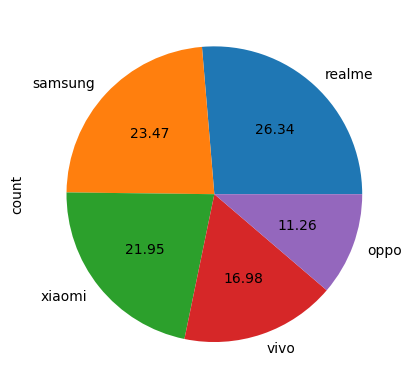

In [776]:
# brand (categorical-object)
df['brand'].value_counts().head().plot(kind = 'pie',autopct="%.2f")

In [777]:
# price ( numerical )
# Distribution is normal and there are not any outlier in data 
df['price'].describe()

count       875.000000
mean      24611.770286
std       27879.422331
min        3895.000000
25%       10499.000000
50%       15000.000000
75%       25992.000000
max      239999.000000
Name: price, dtype: float64

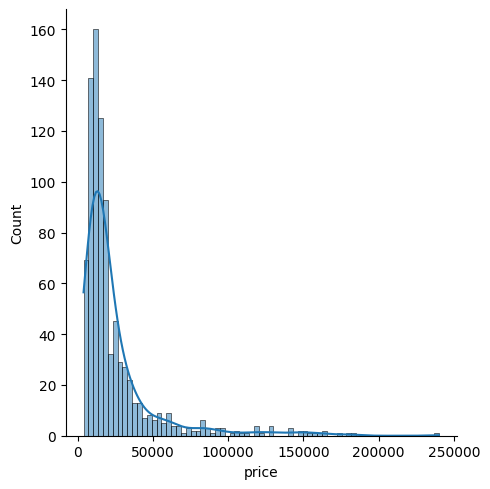

In [778]:
sns.displot(kind ='hist',x = 'price',data = df,kde=True)

<Axes: xlabel='price'>

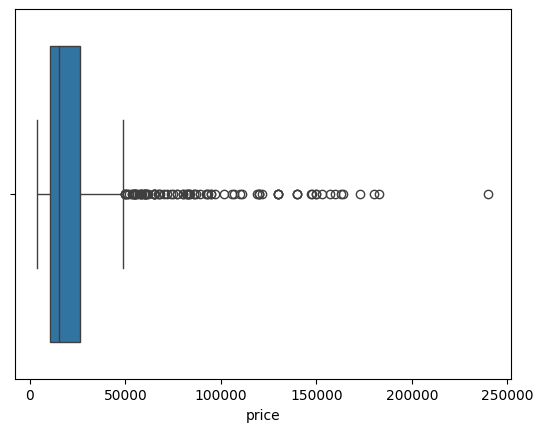

In [779]:
sns.boxplot(data=df,x = "price")

In [780]:
df['price'].isnull().sum()

np.int64(0)

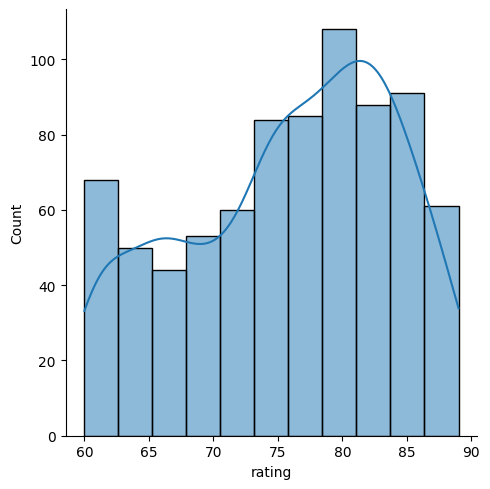

In [781]:
sns.displot(kind ='hist',x = 'rating',data = df,kde=True)

<Axes: xlabel='rating'>

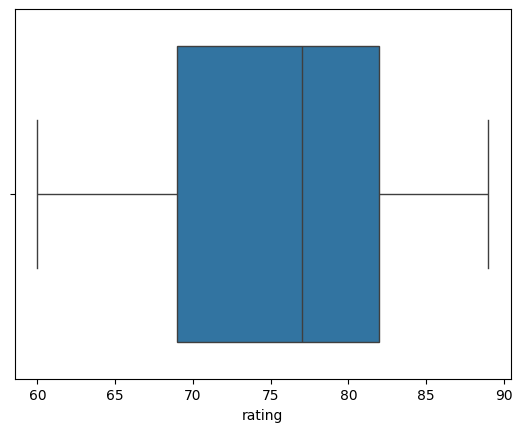

In [782]:
sns.boxplot(data= df , x = 'rating')

In [783]:
# if skew is near to zero then it is a good sign that we have proper data
# if distribution is normal or near to zero then we can do various analysis on the that data 
# but we have 83 missing values which are greater than 10% of the data
# we don't have any outlier in our data
df["rating"].skew()

np.float64(-0.3544904278070238)

<Axes: ylabel='count'>

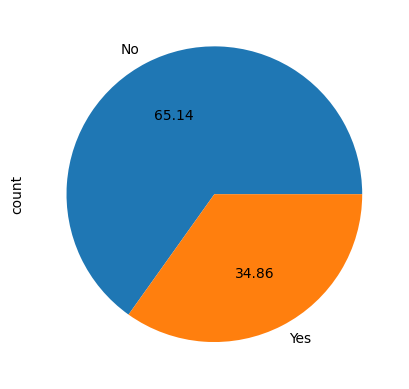

In [784]:
# 5G is a categorical column where we can count values or show on barchart and pychart
df['5G'].value_counts().plot(kind = 'pie',autopct = "%.2f")

<Axes: ylabel='count'>

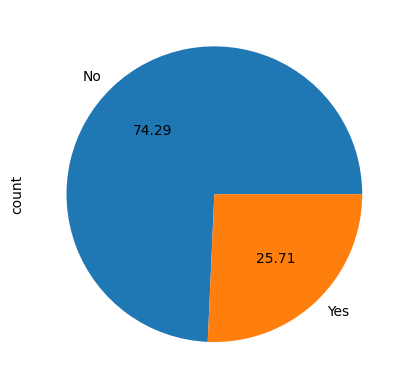

In [785]:
df["NFC"].value_counts().plot(kind = 'pie',autopct = "%.2f")

<Axes: ylabel='count'>

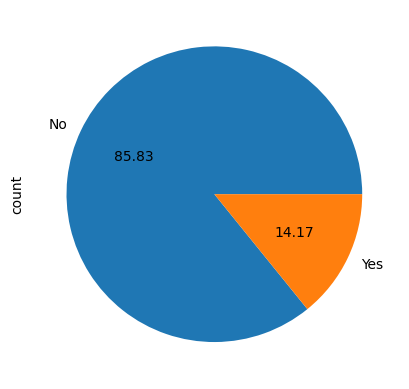

In [786]:
df["IR Blaster"].value_counts().plot(kind='pie',autopct="%.2f")

In [787]:
# processor_brand is also an categorical column

<Axes: ylabel='count'>

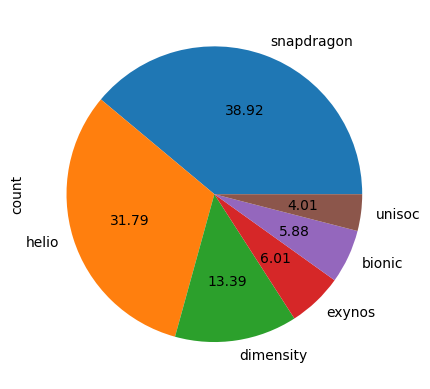

In [788]:
df['processor_brand'].value_counts().head(6).plot(kind='pie',autopct = "%.2f")

<Axes: xlabel='processor_brand'>

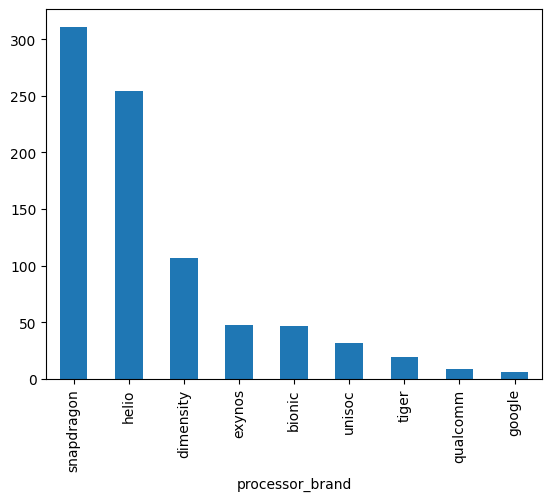

In [789]:
df['processor_brand'].value_counts().head(9).plot(kind = 'bar')

<Axes: ylabel='count'>

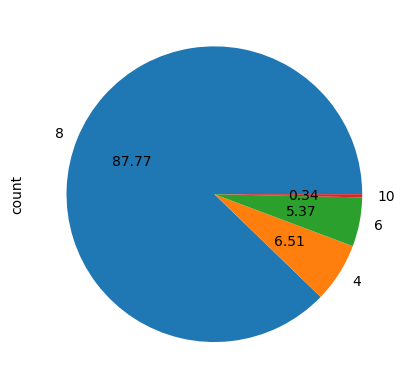

In [790]:
# approx 90% of its values comes under one segment so that is not going to effect that much during machine learning model and analysis
df['num_core'].value_counts().plot(kind = 'pie',autopct = "%.2f")

<Axes: ylabel='count'>

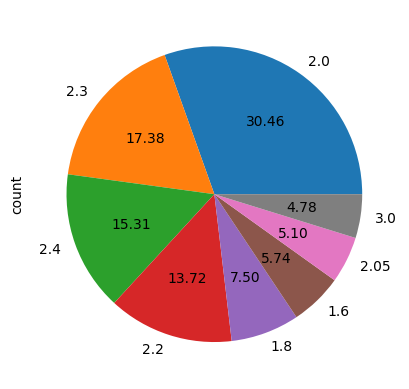

In [791]:
df['speed_processor'].value_counts().head(8).plot(kind = "pie",autopct = "%.2f")

<Axes: ylabel='count'>

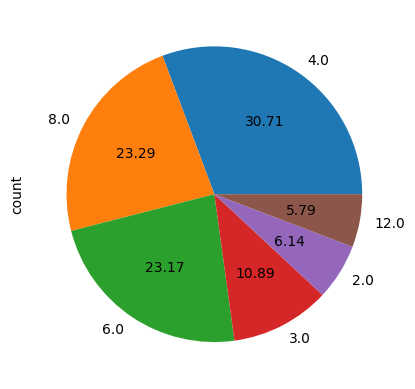

In [792]:
df['phone_ram'].value_counts().head(6).plot(kind = 'pie',autopct = "%.2f")

<Axes: ylabel='count'>

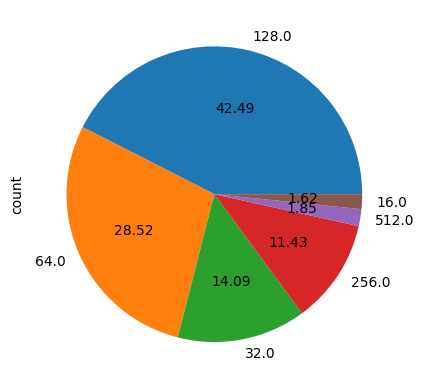

In [793]:
df['phone_rom'].value_counts().head(6).plot(kind= "pie",autopct = "%.2f")

<Axes: ylabel='count'>

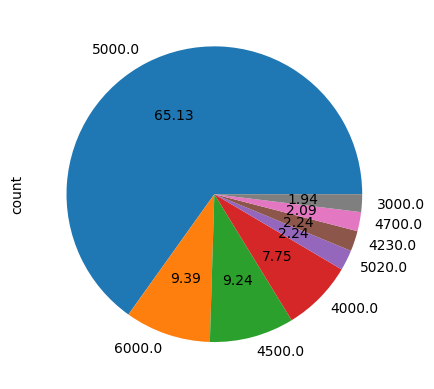

In [794]:
df["battery_capacity"].value_counts().head(8).plot(kind ="pie",autopct="%.2f")

<Axes: ylabel='count'>

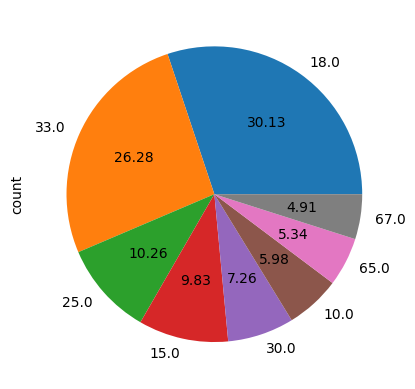

In [795]:
df['fast_charging'].value_counts().head(8).plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

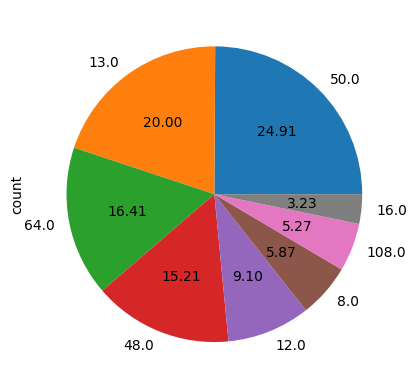

In [796]:
df['primary_rear_camera'].value_counts().head(8).plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

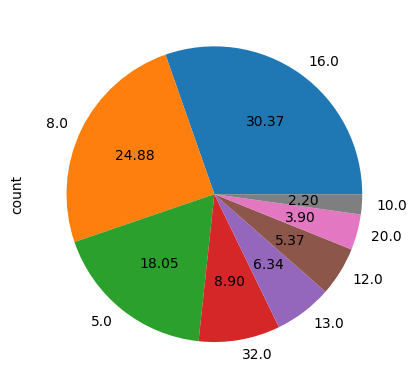

In [797]:
df['primary_front_camera'].value_counts().head(8).plot(kind='pie',autopct = "%.2f")

<Axes: ylabel='count'>

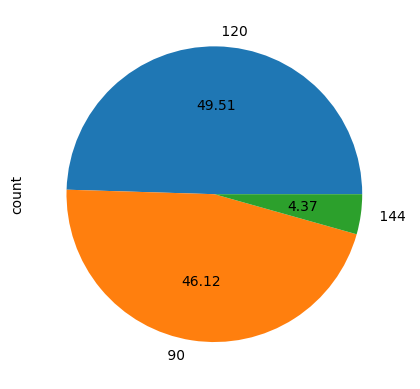

In [798]:
df['display_hertz'].value_counts().plot(kind = "pie",autopct = "%.2f")

In [799]:
temp_df = df[df['total_front_camera'] == "missing"]

In [800]:
df.loc[temp_df.index,'total_front_camera'] = np.nan

In [801]:
all_camera = df['total_back_camera'] + df["total_front_camera"]

<Axes: ylabel='count'>

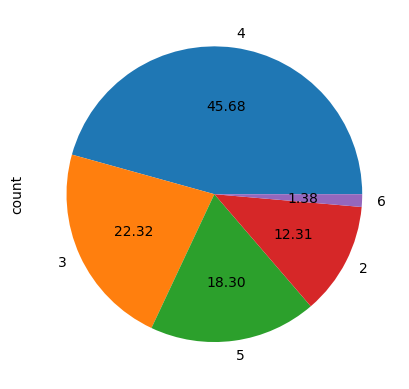

In [802]:
all_camera.value_counts().plot(kind = "pie",autopct = "%.2f")

<Axes: ylabel='count'>

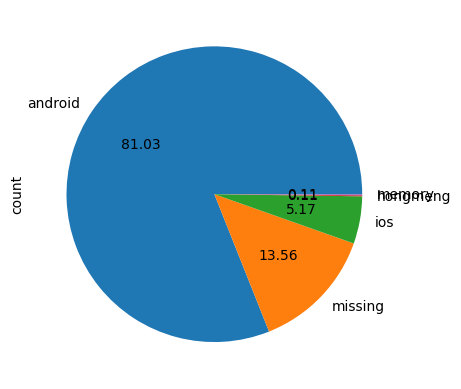

In [803]:
df['operating_system'].value_counts().head().plot(kind= 'pie',autopct = "%.2f")

<Axes: ylabel='count'>

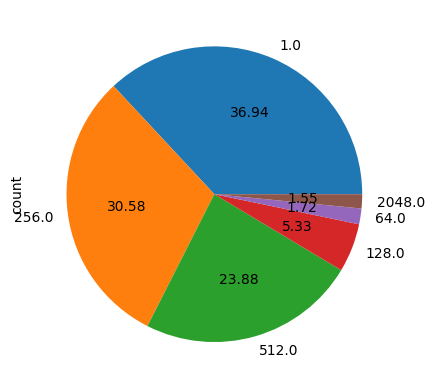

In [804]:
df['memory_card'].value_counts().head(6).plot(kind= "pie",autopct = "%.2f")

In [805]:
#df.to_excel("phone_cleaned.xlsx")


In [806]:
def pie_plot(column_name):
    fig, axs = plt.subplots(1)
    df[column_name].value_counts().head(8).plot(kind ="bar")
    fig, axs = plt.subplots(1)
    df[column_name].value_counts().head(10).plot(kind ="pie",autopct = "%.2f" , y = column_name)
    sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
    sns.catplot(kind='box',data=df,x=column_name)



    

In [807]:
mew = df.select_dtypes(include=['float64','int64']).columns

Uni-variate Analysis

/tmp/ipykernel_1445/1556122976.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1)


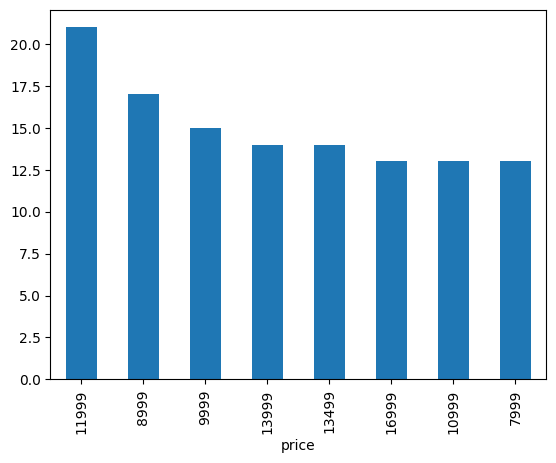

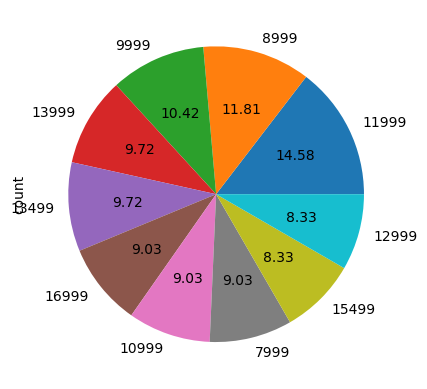

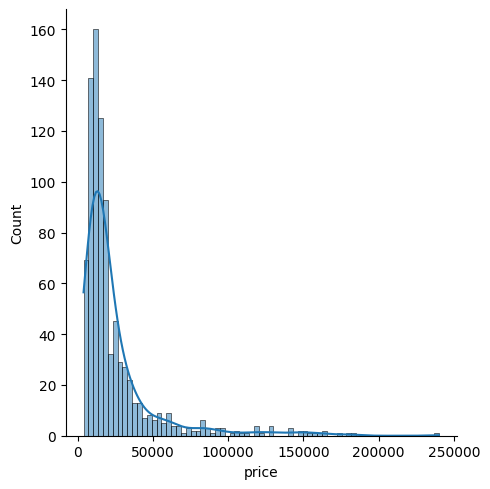

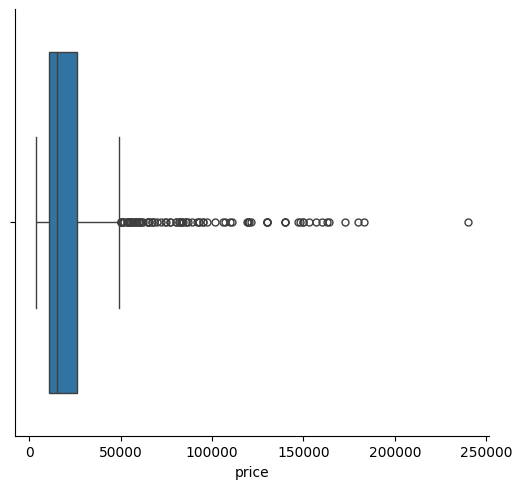

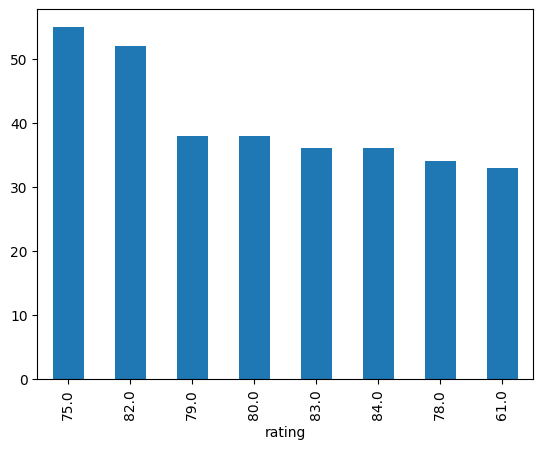

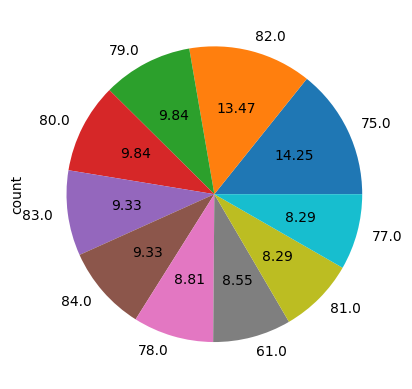

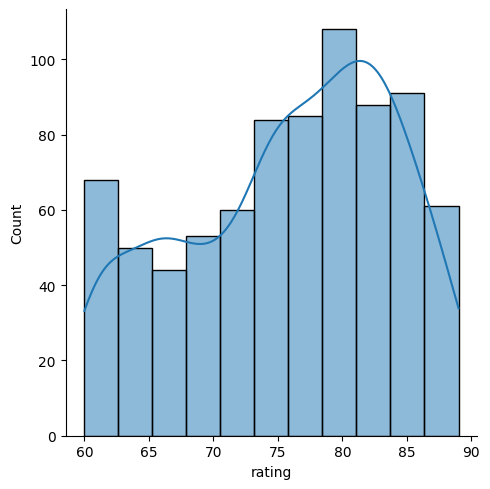

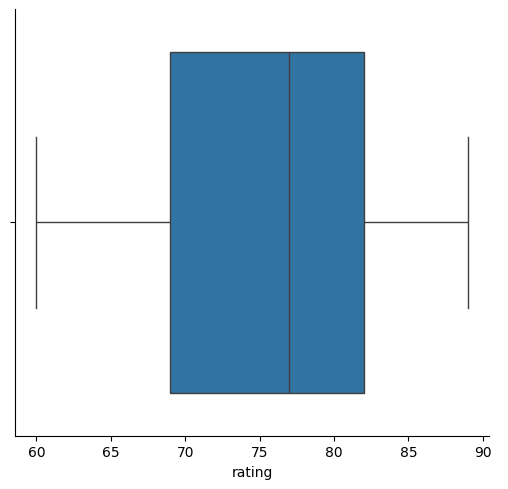

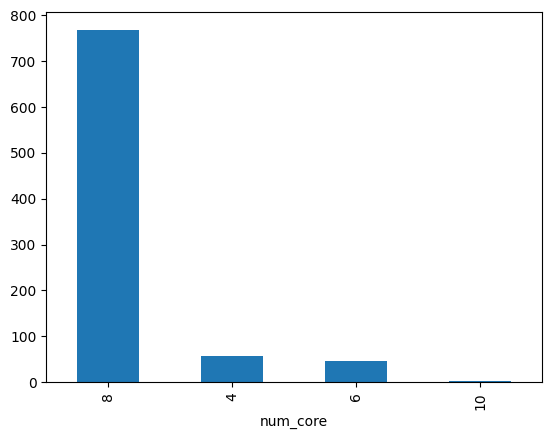

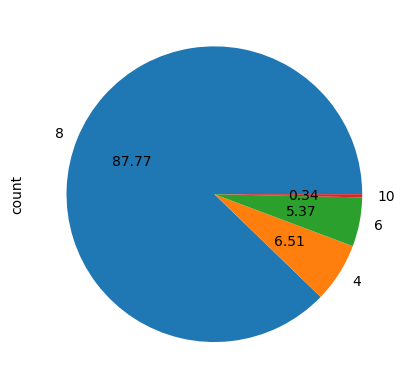

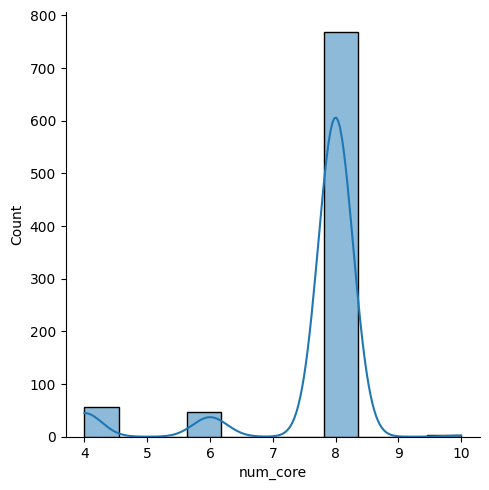

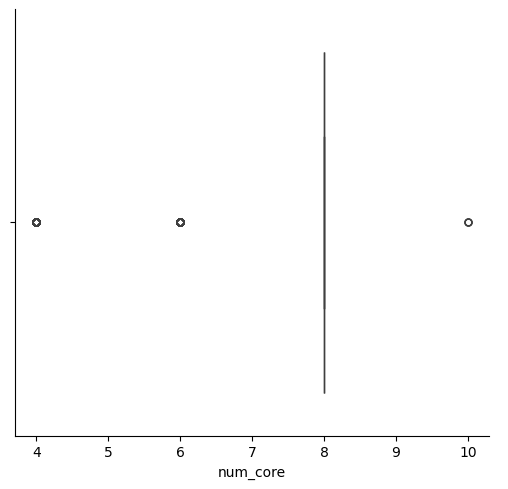

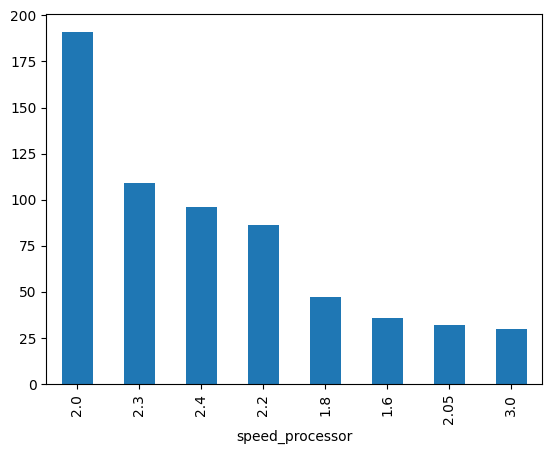

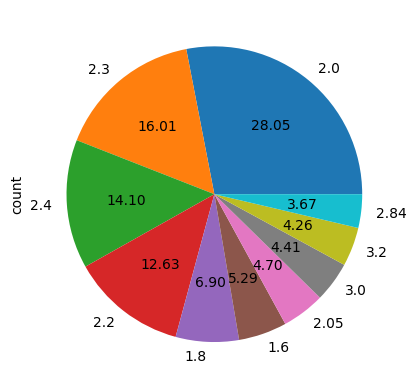

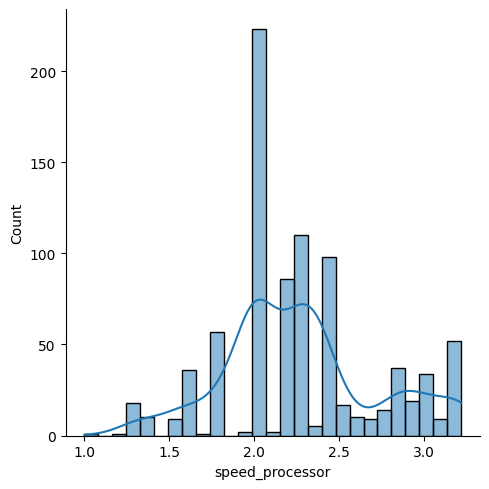

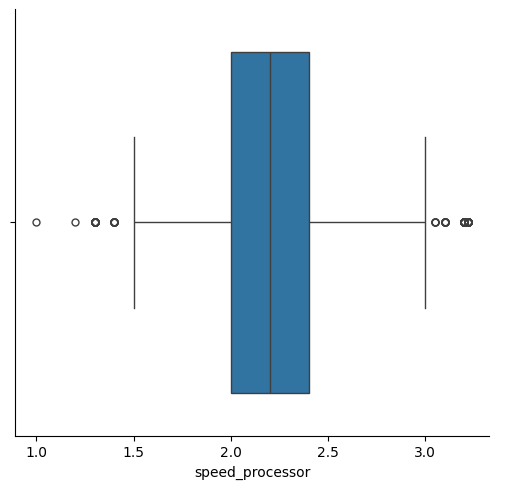

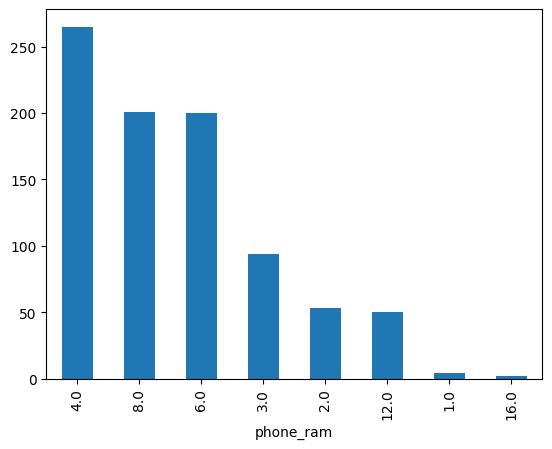

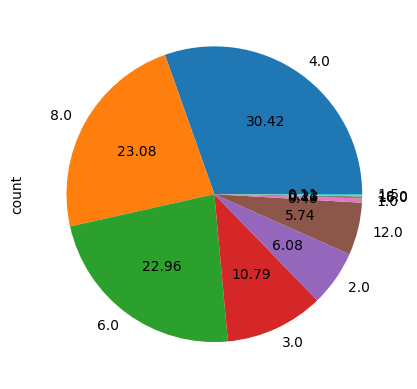

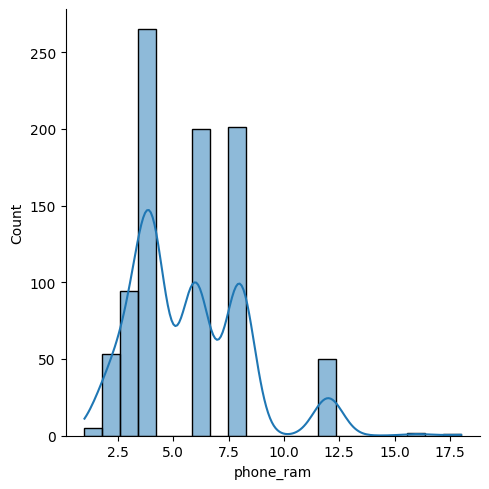

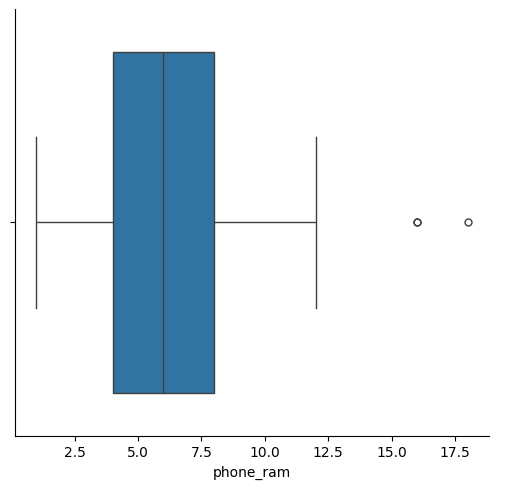

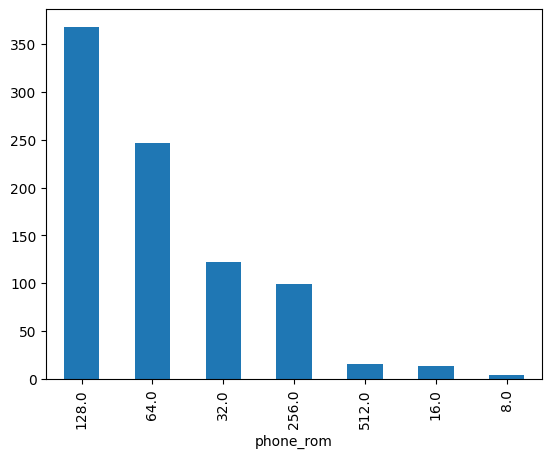

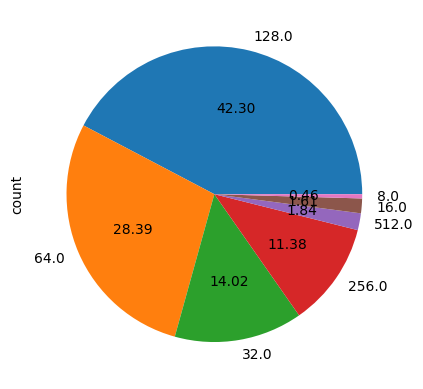

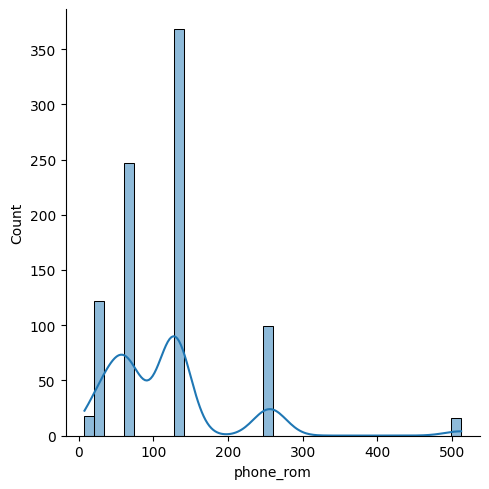

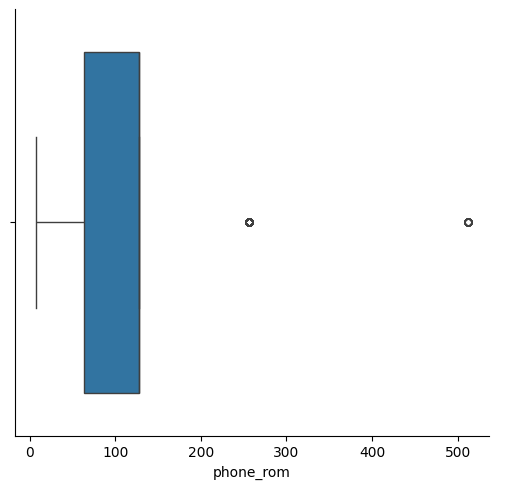

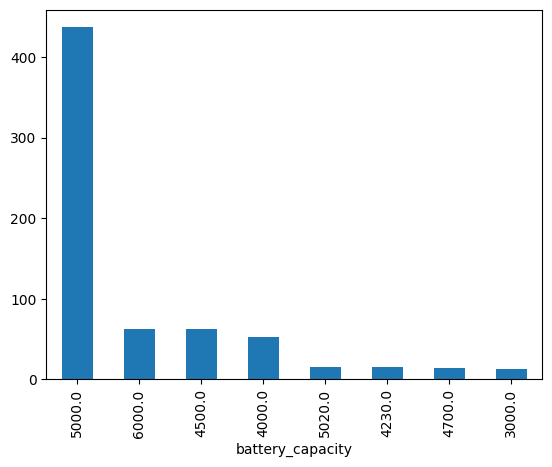

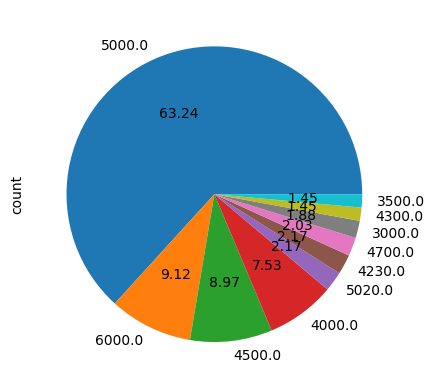

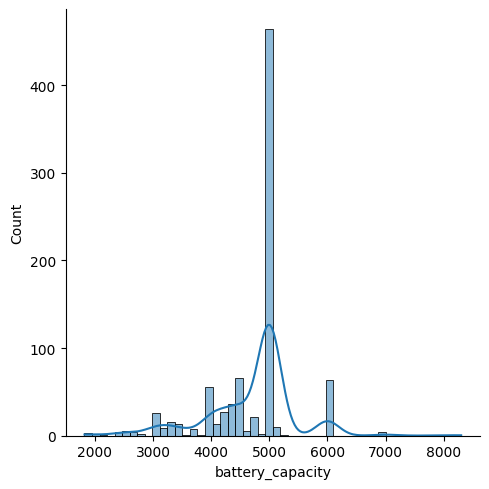

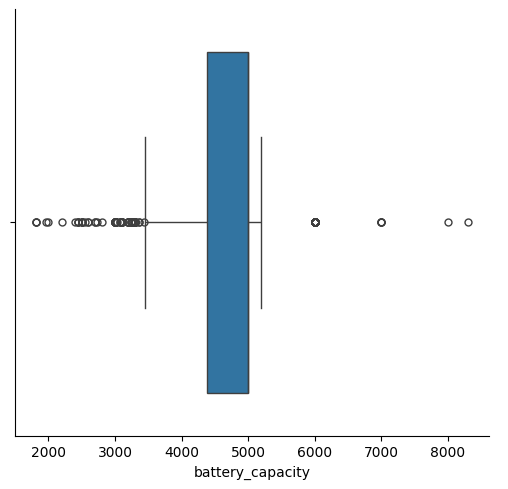

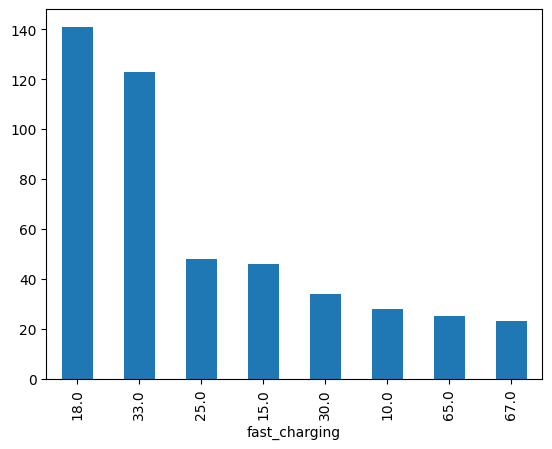

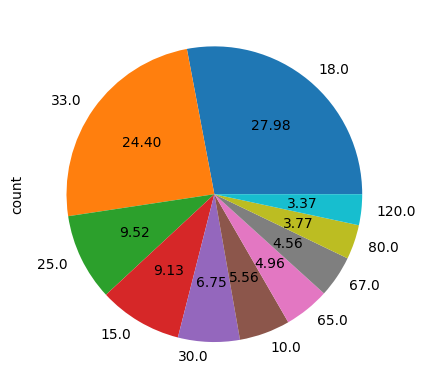

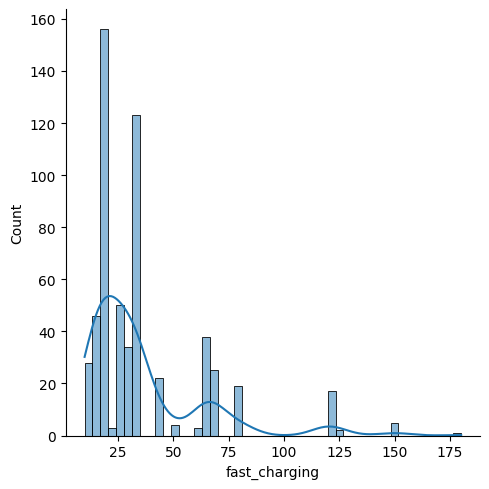

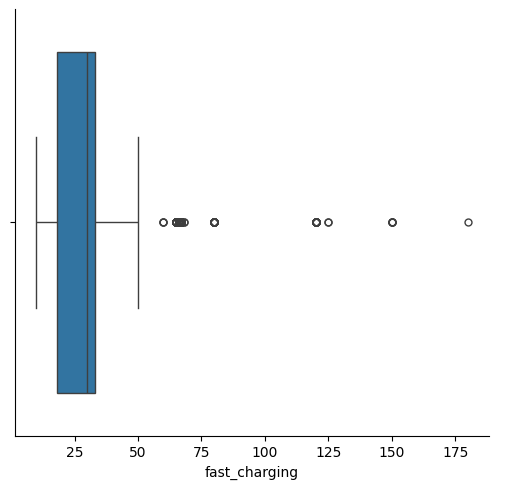

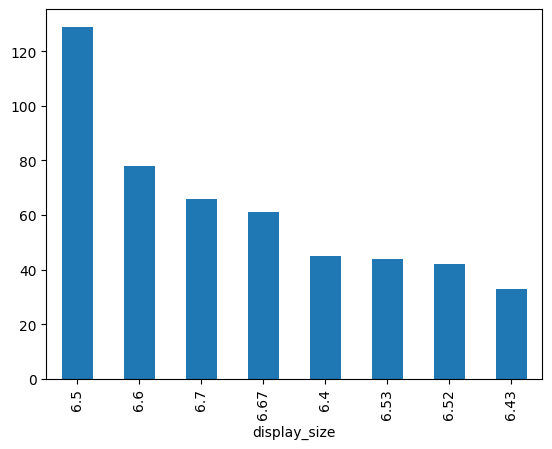

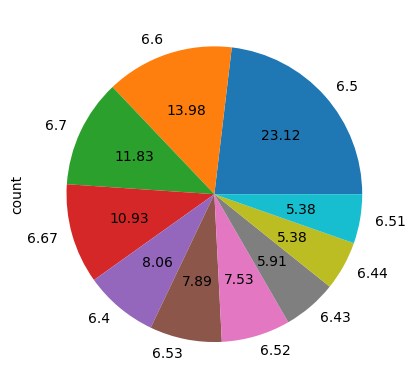

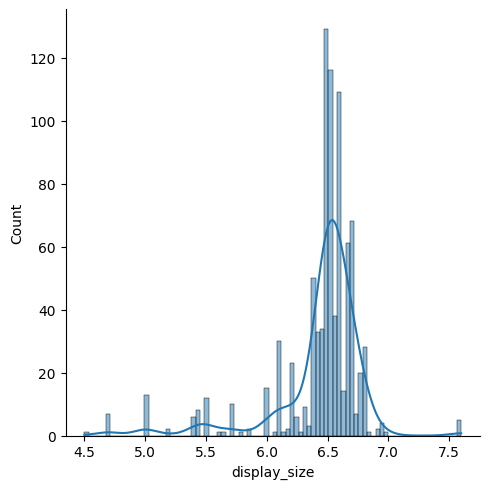

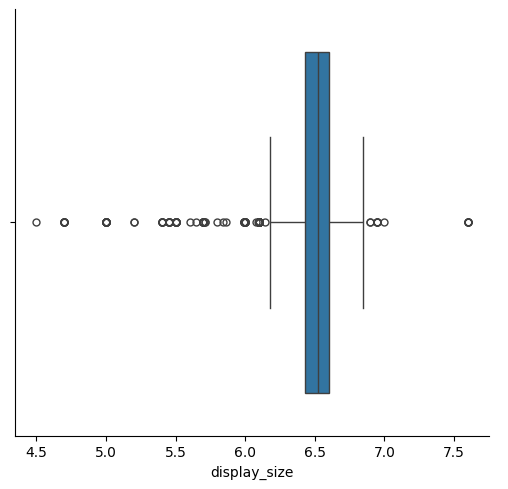

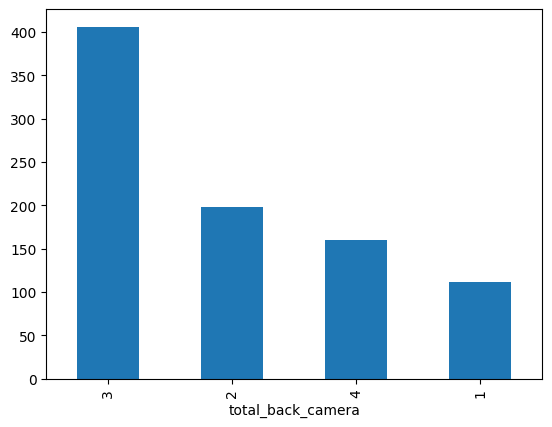

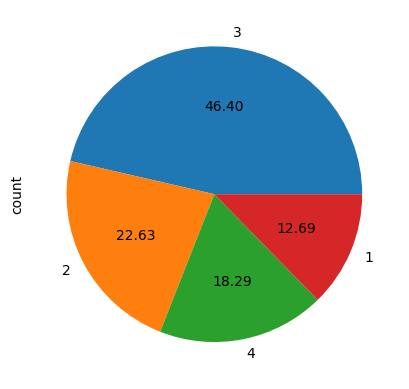

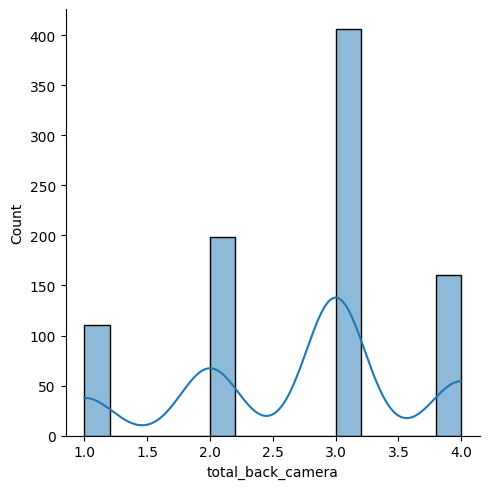

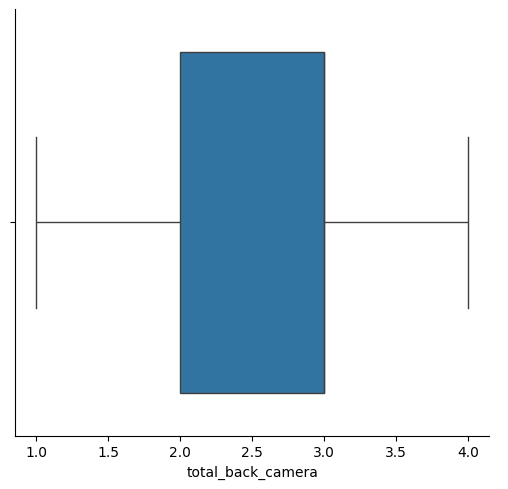

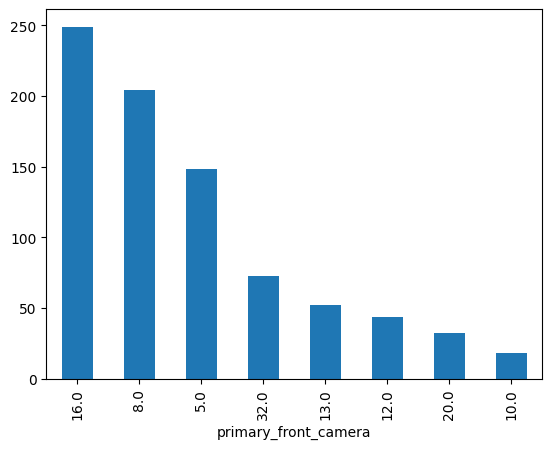

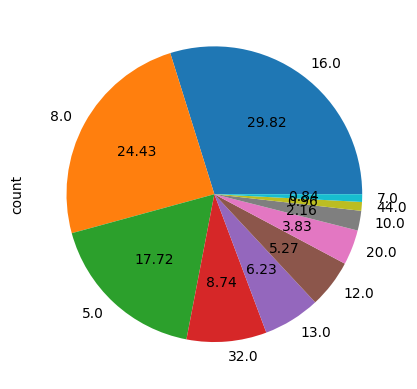

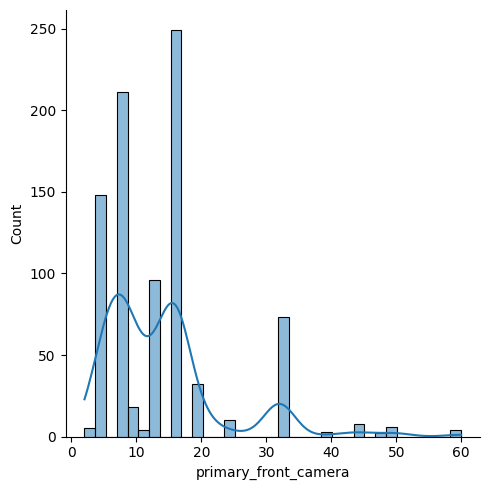

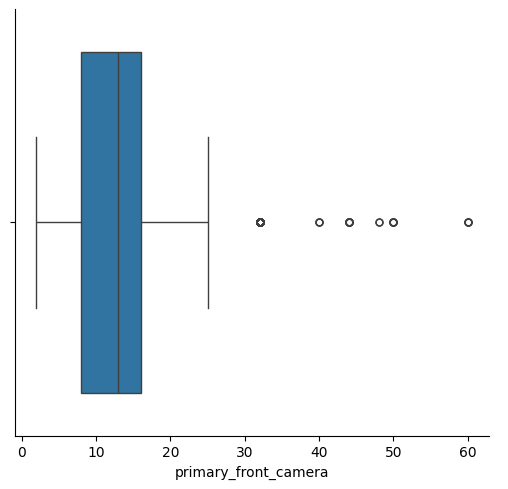

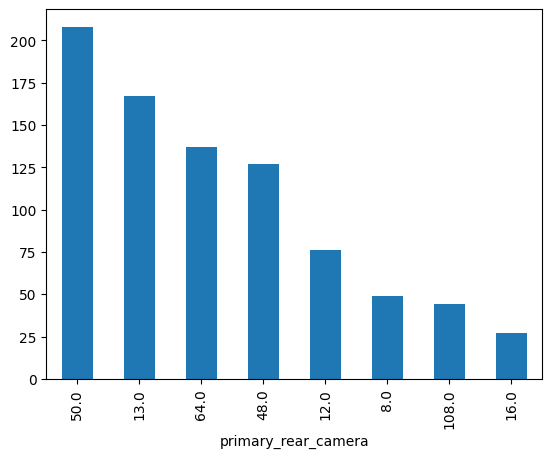

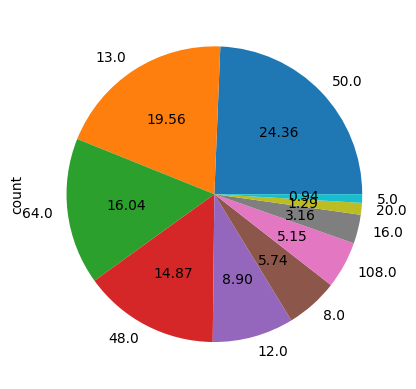

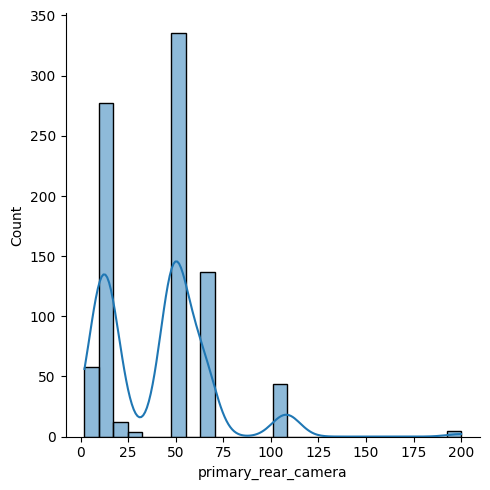

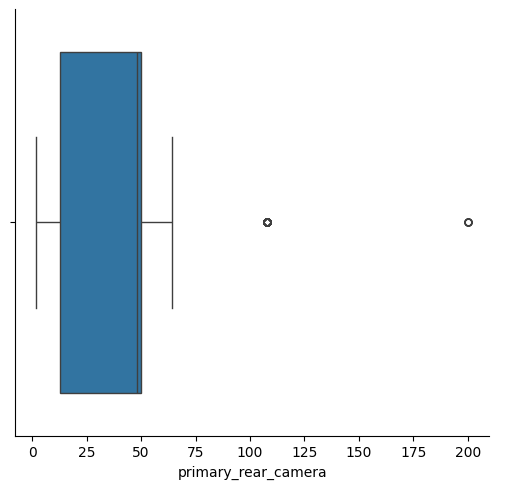

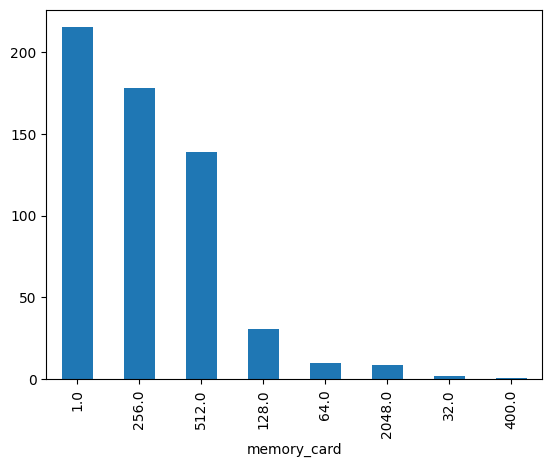

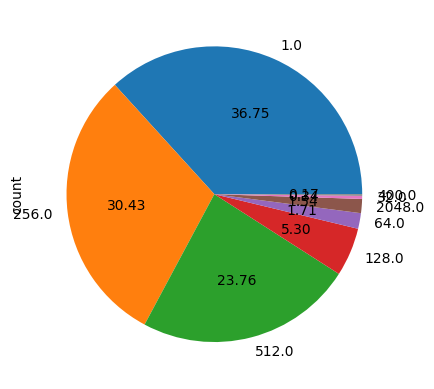

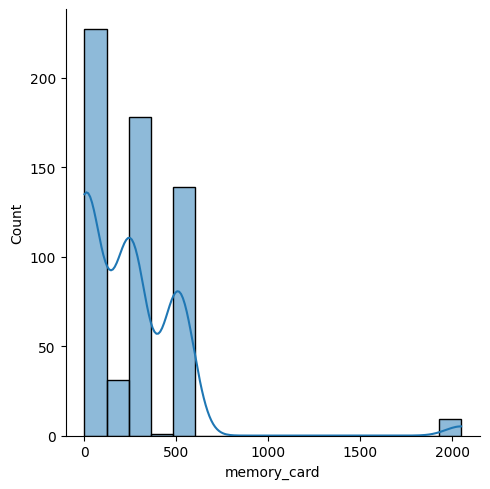

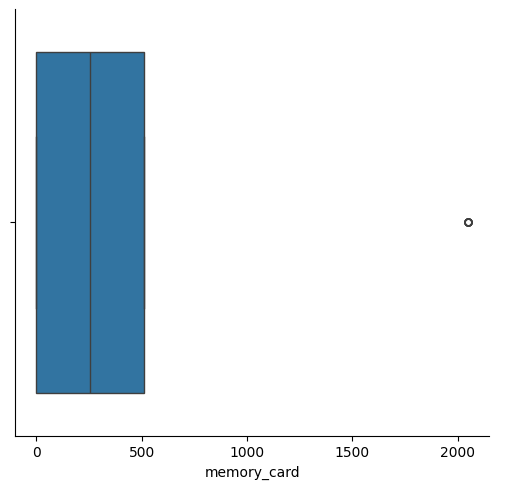

In [808]:
for i in mew:
    pie_plot(i)

([0, 1, 2, 3],
 [Text(0, 0, 'samsung'),
  Text(1, 0, 'itel'),
  Text(2, 0, 'cat'),
  Text(3, 0, 'ikall')])

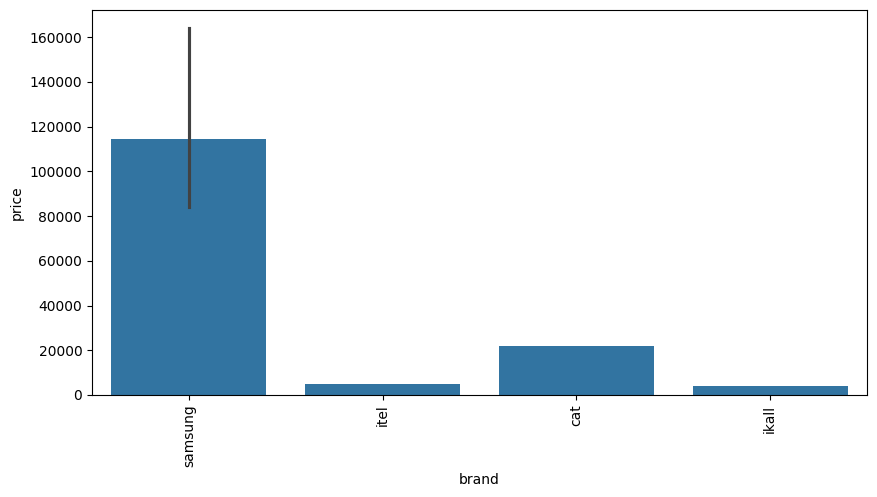

In [809]:
plt.figure(figsize=(10,5))
sns.barplot(data= temp_df,x="brand",y ='price')
plt.xticks(rotation='vertical')

In [810]:
df['brand'].value_counts().sort_values(ascending=False) >10

brand
realme         True
samsung        True
xiaomi         True
vivo           True
oppo           True
apple          True
poco           True
motorola       True
tecno          True
infinix        True
iqoo           True
ikall          True
nokia          True
oneplus        True
lava           True
google         True
micromax      False
itel          False
asus          False
lyf           False
huawei        False
sony          False
nothing       False
oukitel       False
lg            False
gionee        False
jio           False
blackberry    False
yu            False
telefono      False
coolpad       False
cat           False
swipe         False
Name: count, dtype: bool

In [811]:
#df[df['brand'].isin(x.index)]

<Axes: xlabel='rating', ylabel='price'>

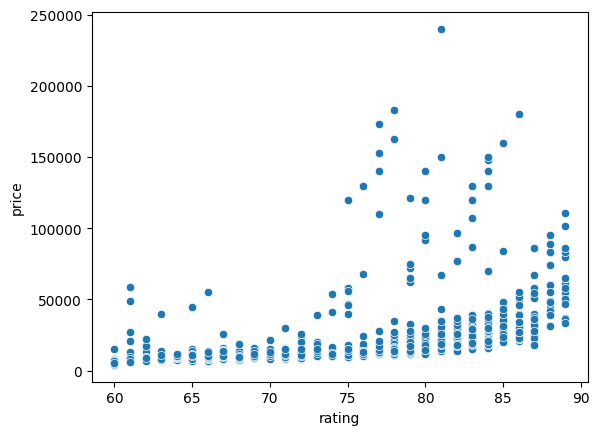

In [812]:
sns.scatterplot(data = df,x ="rating" ,y = "price")

<Axes: xlabel='battery_capacity', ylabel='price'>

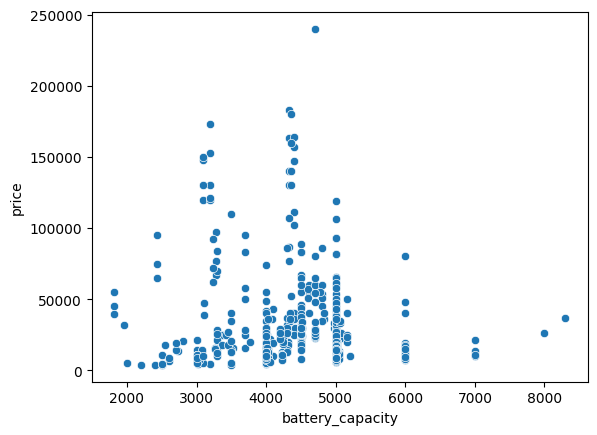

In [813]:
sns.scatterplot(data = df,x ="battery_capacity" ,y = "price")

<Axes: xlabel='5G', ylabel='price'>

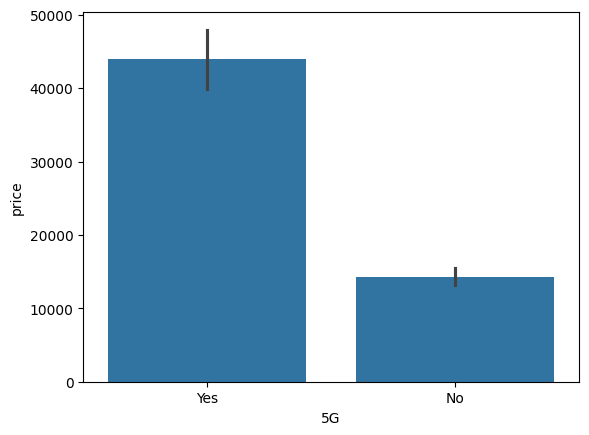

In [814]:
sns.barplot(data=df,x='5G',y="price")

<Axes: xlabel='NFC', ylabel='price'>

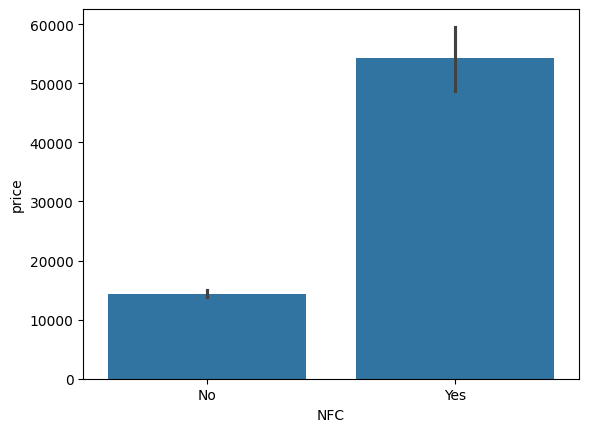

In [815]:
sns.barplot(data=df,x='NFC',y="price")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'qualcomm'),
  Text(10, 0, 'spreadtrum'),
  Text(11, 0, 'kirin'),
  Text(12, 0, 'fusion'),
  Text(13, 0, 'sprd'),
  Text(14, 0, 'mt')])

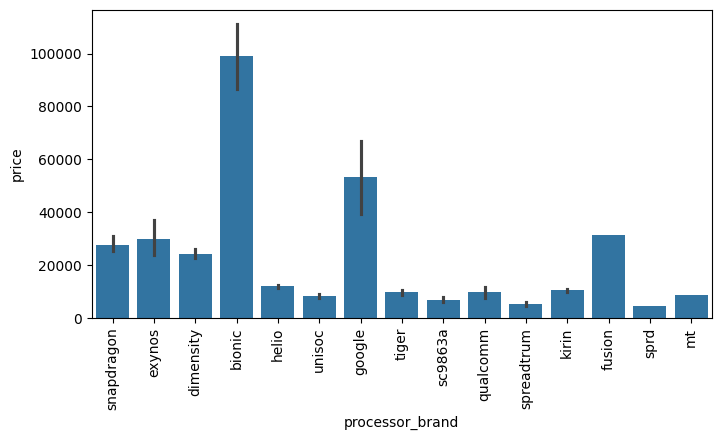

In [816]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='processor_brand',y="price")
plt.xticks(rotation='vertical')

([0, 1, 2, 3],
 [Text(0, 0, '4'), Text(1, 0, '6'), Text(2, 0, '8'), Text(3, 0, '10')])

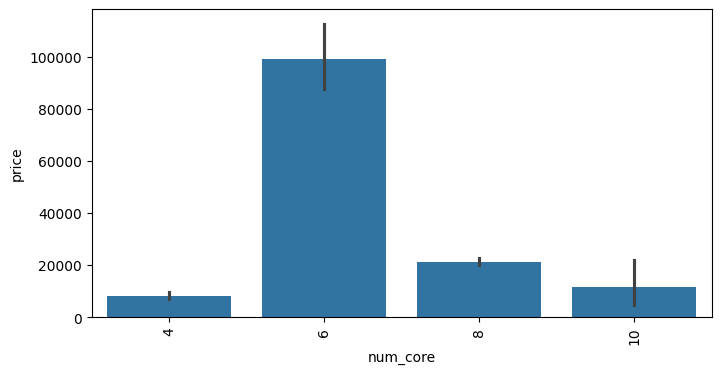

In [817]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='num_core',y="price")
plt.xticks(rotation='vertical')

In [818]:
df.corr(numeric_only=True)['price']

price                   1.000000
rating                  0.436036
num_core               -0.128985
speed_processor         0.682940
phone_ram               0.452886
phone_rom               0.759051
battery_capacity       -0.239317
fast_charging           0.323293
display_size            0.091923
total_back_camera       0.152211
primary_front_camera    0.200905
primary_rear_camera     0.110179
memory_card            -0.059461
Name: price, dtype: float64

In [819]:
df.corr(numeric_only=True)

,price,rating,num_core,speed_processor,phone_ram,phone_rom,battery_capacity,fast_charging,display_size,total_back_camera,primary_front_camera,primary_rear_camera,memory_card
price,1.000000,0.436036,-0.128985,0.682940,0.452886,0.759051,-0.239317,0.323293,0.091923,0.152211,0.200905,0.110179,-0.059461
rating,0.436036,1.000000,0.205678,0.640184,0.819973,0.623600,-0.024483,0.541523,0.322675,0.560417,0.605299,0.661533,-0.070955
num_core,-0.128985,0.205678,1.000000,0.209220,0.283589,0.074774,0.334642,0.097052,0.387961,0.416388,0.197770,0.323663,0.020299
speed_processor,0.682940,0.640184,0.209220,1.000000,0.617359,0.641196,-0.063203,0.603972,0.204951,0.286834,0.357906,0.307178,-0.014596
phone_ram,0.452886,0.819973,0.283589,0.617359,1.000000,0.688606,0.077568,0.573955,0.400953,0.447304,0.581376,0.568123,-0.017471
phone_rom,0.759051,0.623600,0.074774,0.641196,0.688606,1.000000,-0.036184,0.455938,0.229543,0.312406,0.378809,0.345886,-0.066001
battery_capacity,-0.239317,-0.024483,0.334642,-0.063203,0.077568,-0.036184,1.000000,-0.147299,0.677802,0.371664,-0.059502,0.250271,0.011942
fast_charging,0.323293,0.541523,0.097052,0.603972,0.573955,0.455938,-0.147299,1.000000,0.198055,0.088634,0.352946,0.450596,-0.050118
display_size,0.091923,0.322675,0.387961,0.204951,0.400953,0.229543,0.677802,0.198055,1.000000,0.472252,0.216165,0.393730,0.031733
total_back_camera,0.152211,0.560417,0.416388,0.286834,0.447304,0.312406,0.371664,0.088634,0.472252,1.000000,0.416804,0.539497,0.052502


<Axes: >

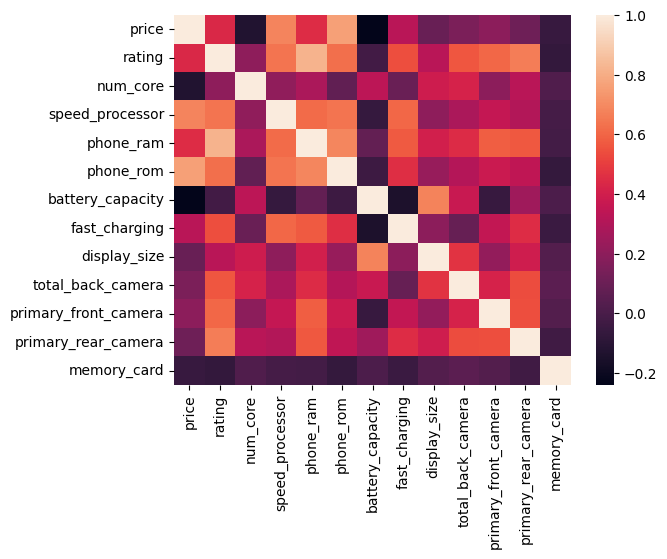

In [820]:
sns.heatmap(df.corr(numeric_only=True))

In [821]:
x_df = df.select_dtypes(include=['int64',"float64"]).drop(columns = "price")

In [822]:
from sklearn.impute import KNNImputer

In [823]:
imuter = KNNImputer(n_neighbors=5)
x_df_values = imuter.fit_transform(x_df)
new_df = pd.DataFrame(x_df_values,columns = x_df.columns)

In [824]:
new_df.isnull().sum()

rating                  0
num_core                0
speed_processor         0
phone_ram               0
phone_rom               0
battery_capacity        0
fast_charging           0
display_size            0
total_back_camera       0
primary_front_camera    0
primary_rear_camera     0
memory_card             0
dtype: int64

In [825]:
new_df['price'] = df['price']

In [826]:
new_df.head()

,rating,num_core,speed_processor,phone_ram,phone_rom,battery_capacity,fast_charging,display_size,total_back_camera,primary_front_camera,primary_rear_camera,memory_card,price
0,81.0,8.0,2.2,6.0,128.0,5000.0,33.0,6.59,3.0,16.0,64.0,1.0,18999.0
1,75.0,8.0,2.4,4.0,64.0,5000.0,15.0,6.60,3.0,13.0,50.0,1.0,16499.0
2,80.0,8.0,2.2,6.0,128.0,5000.0,25.0,6.60,3.0,8.0,50.0,1.0,16999.0
3,81.0,8.0,2.2,6.0,128.0,5000.0,29.2,6.55,3.0,16.0,50.0,1.0,14999.0
4,82.0,8.0,2.6,6.0,128.0,5000.0,67.0,6.70,3.0,16.0,108.0,52.0,24999.0


In [827]:
a = new_df.corr()['price'].reset_index()

In [828]:
df.isnull().sum()

brand                     0
model                     0
price                     0
rating                   83
5G                        0
NFC                       0
IR Blaster                0
processor_brand          29
phone_processor          29
num_core                  0
speed_processor          15
phone_ram                 4
phone_rom                 5
battery_capacity         12
fast_charging           299
display_size              0
display_hertz           463
screen_pixel              0
total_back_camera         0
total_front_camera        6
primary_front_camera      6
primary_rear_camera       3
memory_card             290
operating_system          4
dtype: int64

In [829]:
b = df.corr(numeric_only=True)['price'].reset_index()

In [830]:
a.merge(b,on='index')

,index,price_x,price_y
0,rating,0.149306,0.436036
1,num_core,-0.077367,-0.128985
2,speed_processor,0.217882,0.682940
3,phone_ram,0.165200,0.452886
4,phone_rom,0.178906,0.759051
5,battery_capacity,-0.129747,-0.239317
6,fast_charging,0.172161,0.323293
7,display_size,0.004054,0.091923
8,total_back_camera,0.029156,0.152211
9,primary_front_camera,0.122167,0.200905


In [831]:
# pd.dummies is used to change all the object(criteria) in 0 and 1 and after that you can do co-relation analysis between these columns 